In [128]:
## import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  ## for statistical graphics in python##

In [129]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [130]:
## read the dataset
work_data = pd.read_csv('/Users/vickyogo/Downloads/wk3data.csv')
work_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-27T02:35:24.080Z,33.493833,-116.585833,8.820,0.49,ml,14.0,83.0,0.01370,0.19,...,2023-09-27T02:38:55.018Z,"11 km SE of Anza, CA",earthquake,0.42,0.830,0.21400,8.0,automatic,ci,ci
1,2023-09-27T02:28:05.207Z,59.845200,-151.755700,72.800,1.80,ml,NaN,NaN,NaN,0.45,...,2023-09-27T02:30:09.905Z,"8 km NNE of Anchor Point, Alaska",earthquake,NaN,0.900,NaN,NaN,automatic,ak,ak
2,2023-09-27T02:24:34.830Z,36.073833,-121.678497,17.440,2.20,md,26.0,220.0,0.11090,0.09,...,2023-09-27T02:31:12.747Z,"12 km WNW of Lopez Point, CA",earthquake,0.78,0.380,0.22000,22.0,automatic,nc,nc
3,2023-09-27T02:14:27.605Z,54.998000,-160.455900,49.669,5.10,mb,95.0,154.0,0.35200,0.93,...,2023-09-27T02:38:35.118Z,"37 km S of Sand Point, Alaska",earthquake,4.85,5.561,0.05000,128.0,reviewed,us,us
4,2023-09-27T02:14:24.660Z,33.251000,-116.129000,3.080,0.90,ml,18.0,83.0,0.10050,0.22,...,2023-09-27T02:18:05.487Z,"12 km N of Ocotillo Wells, CA",earthquake,0.35,0.580,0.09900,18.0,automatic,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9570,2023-08-28T02:44:56.290Z,46.768667,-121.968000,9.050,0.30,ml,21.0,193.0,0.04480,0.18,...,2023-08-30T21:32:39.350Z,"4 km ENE of Ashford, Washington",earthquake,0.55,0.480,0.20417,10.0,reviewed,uw,uw
9571,2023-08-28T02:43:26.229Z,41.730000,-80.972000,5.000,3.60,mwr,84.0,47.0,0.82900,0.74,...,2023-09-24T23:39:23.243Z,"7 km SE of Madison, Ohio",earthquake,4.63,1.925,0.04100,58.0,reviewed,us,us
9572,2023-08-28T02:43:18.900Z,35.679833,-117.540833,5.210,1.47,ml,22.0,55.0,0.09649,0.14,...,2023-08-29T23:19:16.562Z,"14 km ENE of Ridgecrest, CA",earthquake,0.23,0.640,0.12200,15.0,reviewed,ci,ci
9573,2023-08-28T02:42:55.780Z,19.364666,-155.298004,2.130,1.80,ml,14.0,103.0,NaN,0.20,...,2023-08-28T02:48:27.220Z,"10 km SW of Volcano, Hawaii",earthquake,0.39,0.570,0.19000,3.0,automatic,hv,hv


In [131]:
## first 10 rows
workHead = work_data.head(10)
workHead

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-27T02:35:24.080Z,33.493833,-116.585833,8.820,0.49,ml,14.0,83.0,0.01370,0.19,...,2023-09-27T02:38:55.018Z,"11 km SE of Anza, CA",earthquake,0.42,0.830,0.214,8.0,automatic,ci,ci
1,2023-09-27T02:28:05.207Z,59.845200,-151.755700,72.800,1.80,ml,NaN,NaN,NaN,0.45,...,2023-09-27T02:30:09.905Z,"8 km NNE of Anchor Point, Alaska",earthquake,NaN,0.900,NaN,NaN,automatic,ak,ak
2,2023-09-27T02:24:34.830Z,36.073833,-121.678497,17.440,2.20,md,26.0,220.0,0.11090,0.09,...,2023-09-27T02:31:12.747Z,"12 km WNW of Lopez Point, CA",earthquake,0.78,0.380,0.220,22.0,automatic,nc,nc
3,2023-09-27T02:14:27.605Z,54.998000,-160.455900,49.669,5.10,mb,95.0,154.0,0.35200,0.93,...,2023-09-27T02:38:35.118Z,"37 km S of Sand Point, Alaska",earthquake,4.85,5.561,0.050,128.0,reviewed,us,us
4,2023-09-27T02:14:24.660Z,33.251000,-116.129000,3.080,0.90,ml,18.0,83.0,0.10050,0.22,...,2023-09-27T02:18:05.487Z,"12 km N of Ocotillo Wells, CA",earthquake,0.35,0.580,0.099,18.0,automatic,ci,ci
5,2023-09-27T02:13:22.880Z,17.947500,-66.941800,8.000,3.32,md,13.0,206.0,0.10470,0.15,...,2023-09-27T02:31:03.689Z,"4 km SW of Guánica, Puerto Rico",earthquake,0.52,1.140,0.020,7.0,reviewed,pr,pr
6,2023-09-27T01:59:55.340Z,61.586800,-150.252600,47.800,1.80,ml,NaN,NaN,NaN,0.52,...,2023-09-27T02:01:48.777Z,"14 km ENE of Susitna, Alaska",earthquake,NaN,0.900,NaN,NaN,automatic,ak,ak
7,2023-09-27T01:40:56.987Z,61.455500,-151.043700,72.300,1.30,ml,NaN,NaN,NaN,0.52,...,2023-09-27T01:43:10.186Z,"29 km WSW of Susitna, Alaska",earthquake,NaN,0.900,NaN,NaN,automatic,ak,ak
8,2023-09-27T01:29:07.950Z,35.882000,-117.685333,2.290,2.98,ml,42.0,55.0,0.09771,0.17,...,2023-09-27T01:39:47.820Z,"21 km ESE of Little Lake, CA",earthquake,0.27,0.470,0.246,24.0,automatic,ci,ci
9,2023-09-27T01:23:16.030Z,34.046500,-117.271667,11.470,1.11,ml,32.0,36.0,0.08619,0.27,...,2023-09-27T01:26:53.233Z,"1 km WSW of Loma Linda, CA",earthquake,0.35,0.630,0.189,29.0,automatic,ci,ci


In [132]:
## information about the dataset
work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9575 non-null   object 
 1   latitude         9575 non-null   float64
 2   longitude        9575 non-null   float64
 3   depth            9575 non-null   float64
 4   mag              9574 non-null   float64
 5   magType          9574 non-null   object 
 6   nst              7139 non-null   float64
 7   gap              7139 non-null   float64
 8   dmin             5691 non-null   float64
 9   rms              9575 non-null   float64
 10  net              9575 non-null   object 
 11  id               9575 non-null   object 
 12  updated          9575 non-null   object 
 13  place            9575 non-null   object 
 14  type             9575 non-null   object 
 15  horizontalError  6513 non-null   float64
 16  depthError       9575 non-null   float64
 17  magError      

In [133]:
## check for missing values
work_data.isnull().sum()
# NaN -- NOT A NUMBER

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2436
gap                2436
dmin               3884
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3062
depthError            0
magError           2469
magNst             2447
status                0
locationSource        0
magSource             0
dtype: int64

In [134]:
# replacing empty values with nan and if value is '' or None and then replace it with np.nan
work_data['mag'] = work_data['mag'].replace({'':np.nan})

work_data.replace(to_replace={col: {'':np.nan, None:np.nan} for col in work_data.columns}, inplace=True)

In [135]:
## replacing missing values with median(mid-point value) for the selected columns for better analysis
work_data['mag'] = work_data['mag'].fillna(work_data['mag'].median())
work_data['magType'] = work_data['magType'].fillna(work_data['magType'].mode())
work_data['nst'] = work_data['nst'].fillna(work_data['nst'].median())
work_data['gap'] = work_data['gap'].fillna(work_data['gap'].median())
work_data['dmin'] = work_data['dmin'].fillna(work_data['dmin'].median())
work_data['horizontalError'] = work_data['horizontalError'].fillna(work_data['horizontalError'].median())
work_data['magError'] = work_data['magError'].fillna(work_data['magError'].median())
work_data['magNst'] = work_data['magNst'].fillna(work_data['magNst'].median())
## dataset after replacing values
work_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-27T02:35:24.080Z,33.493833,-116.585833,8.820,0.49,ml,14.0,83.0,0.01370,0.19,...,2023-09-27T02:38:55.018Z,"11 km SE of Anza, CA",earthquake,0.42,0.830,0.21400,8.0,automatic,ci,ci
1,2023-09-27T02:28:05.207Z,59.845200,-151.755700,72.800,1.80,ml,16.0,98.0,0.06227,0.45,...,2023-09-27T02:30:09.905Z,"8 km NNE of Anchor Point, Alaska",earthquake,0.44,0.900,0.16600,10.0,automatic,ak,ak
2,2023-09-27T02:24:34.830Z,36.073833,-121.678497,17.440,2.20,md,26.0,220.0,0.11090,0.09,...,2023-09-27T02:31:12.747Z,"12 km WNW of Lopez Point, CA",earthquake,0.78,0.380,0.22000,22.0,automatic,nc,nc
3,2023-09-27T02:14:27.605Z,54.998000,-160.455900,49.669,5.10,mb,95.0,154.0,0.35200,0.93,...,2023-09-27T02:38:35.118Z,"37 km S of Sand Point, Alaska",earthquake,4.85,5.561,0.05000,128.0,reviewed,us,us
4,2023-09-27T02:14:24.660Z,33.251000,-116.129000,3.080,0.90,ml,18.0,83.0,0.10050,0.22,...,2023-09-27T02:18:05.487Z,"12 km N of Ocotillo Wells, CA",earthquake,0.35,0.580,0.09900,18.0,automatic,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9570,2023-08-28T02:44:56.290Z,46.768667,-121.968000,9.050,0.30,ml,21.0,193.0,0.04480,0.18,...,2023-08-30T21:32:39.350Z,"4 km ENE of Ashford, Washington",earthquake,0.55,0.480,0.20417,10.0,reviewed,uw,uw
9571,2023-08-28T02:43:26.229Z,41.730000,-80.972000,5.000,3.60,mwr,84.0,47.0,0.82900,0.74,...,2023-09-24T23:39:23.243Z,"7 km SE of Madison, Ohio",earthquake,4.63,1.925,0.04100,58.0,reviewed,us,us
9572,2023-08-28T02:43:18.900Z,35.679833,-117.540833,5.210,1.47,ml,22.0,55.0,0.09649,0.14,...,2023-08-29T23:19:16.562Z,"14 km ENE of Ridgecrest, CA",earthquake,0.23,0.640,0.12200,15.0,reviewed,ci,ci
9573,2023-08-28T02:42:55.780Z,19.364666,-155.298004,2.130,1.80,ml,14.0,103.0,0.06227,0.20,...,2023-08-28T02:48:27.220Z,"10 km SW of Volcano, Hawaii",earthquake,0.39,0.570,0.19000,3.0,automatic,hv,hv


In [136]:
## check for missing values after replacing nan
work_data.isnull().sum()
# NaN -- NOT A NUMBER

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            1
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [139]:
work_data.groupby(['mag']).sum(numeric_only=True)

,latitude,longitude,depth,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
mag,,,,,,,,,,,
-1.12,60.018500,-153.068000,-0.690,4.0,136.0,0.06227,0.11,0.30,3.720,0.286711,4.0
-1.05,60.019000,-153.064833,-0.660,5.0,96.0,0.06227,0.15,0.30,3.750,0.100803,4.0
-1.02,60.010833,-153.090333,1.330,5.0,110.0,0.06227,0.10,0.35,1.110,0.205939,5.0
-0.99,60.020167,-153.095500,1.220,5.0,118.0,0.06227,0.22,0.56,0.720,0.309361,5.0
-0.92,120.522000,-305.851167,0.380,11.0,194.0,0.12454,0.16,0.60,2.720,0.485372,9.0
...,...,...,...,...,...,...,...,...,...,...,...
6.20,-30.277500,-71.536000,41.368,65.0,133.0,0.40400,1.03,5.68,5.448,0.047000,43.0
6.30,45.799900,246.449000,217.281,298.0,42.0,6.37300,1.80,14.99,6.956,0.090000,95.0
6.60,-32.724400,-179.306900,89.810,109.0,19.0,3.65100,1.31,8.23,4.720,0.071000,19.0


In [140]:
mag_count = work_data.groupby(['mag']).count()
mag_count

,time,latitude,longitude,depth,magType,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
mag,,,,,,,,,,,,,,,,,,,,,
-1.12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-1.05,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-1.02,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-0.99,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-0.92,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.20,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6.30,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
6.60,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [141]:
work_data.groupby(['mag'])[['longitude', 'latitude']].sum()

,longitude,latitude
mag,,
-1.12,-153.068000,60.018500
-1.05,-153.064833,60.019000
-1.02,-153.090333,60.010833
-0.99,-153.095500,60.020167
-0.92,-305.851167,120.522000
...,...,...
6.20,-71.536000,-30.277500
6.30,246.449000,45.799900
6.60,-179.306900,-32.724400


In [156]:
## BASIC STATISTICS
work_data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000
mean,41.290537,-117.193025,24.440928,1.558205,21.257859,111.804132,0.373205,0.293194,1.282659,2.110591,0.208065,15.034674
std,19.071467,64.500276,55.382143,1.204338,19.790585,57.349466,1.568722,0.268129,3.220205,4.991951,0.292542,24.444222
min,-65.899300,-179.994000,-3.430000,-1.120000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.036167,-152.343567,2.900000,0.780000,12.000000,76.000000,0.048175,0.100000,0.320000,0.400000,0.130000,7.000000
50%,38.839667,-122.790169,8.170000,1.330000,16.000000,98.000000,0.062270,0.180000,0.440000,0.700000,0.166000,10.000000
75%,58.184750,-116.569417,17.930000,2.000000,23.000000,128.000000,0.078460,0.460000,0.640000,1.500000,0.207348,14.000000
max,79.568100,179.967500,649.778000,7.100000,393.000000,357.000000,31.781000,2.820000,176.932676,87.300000,5.240000,600.000000


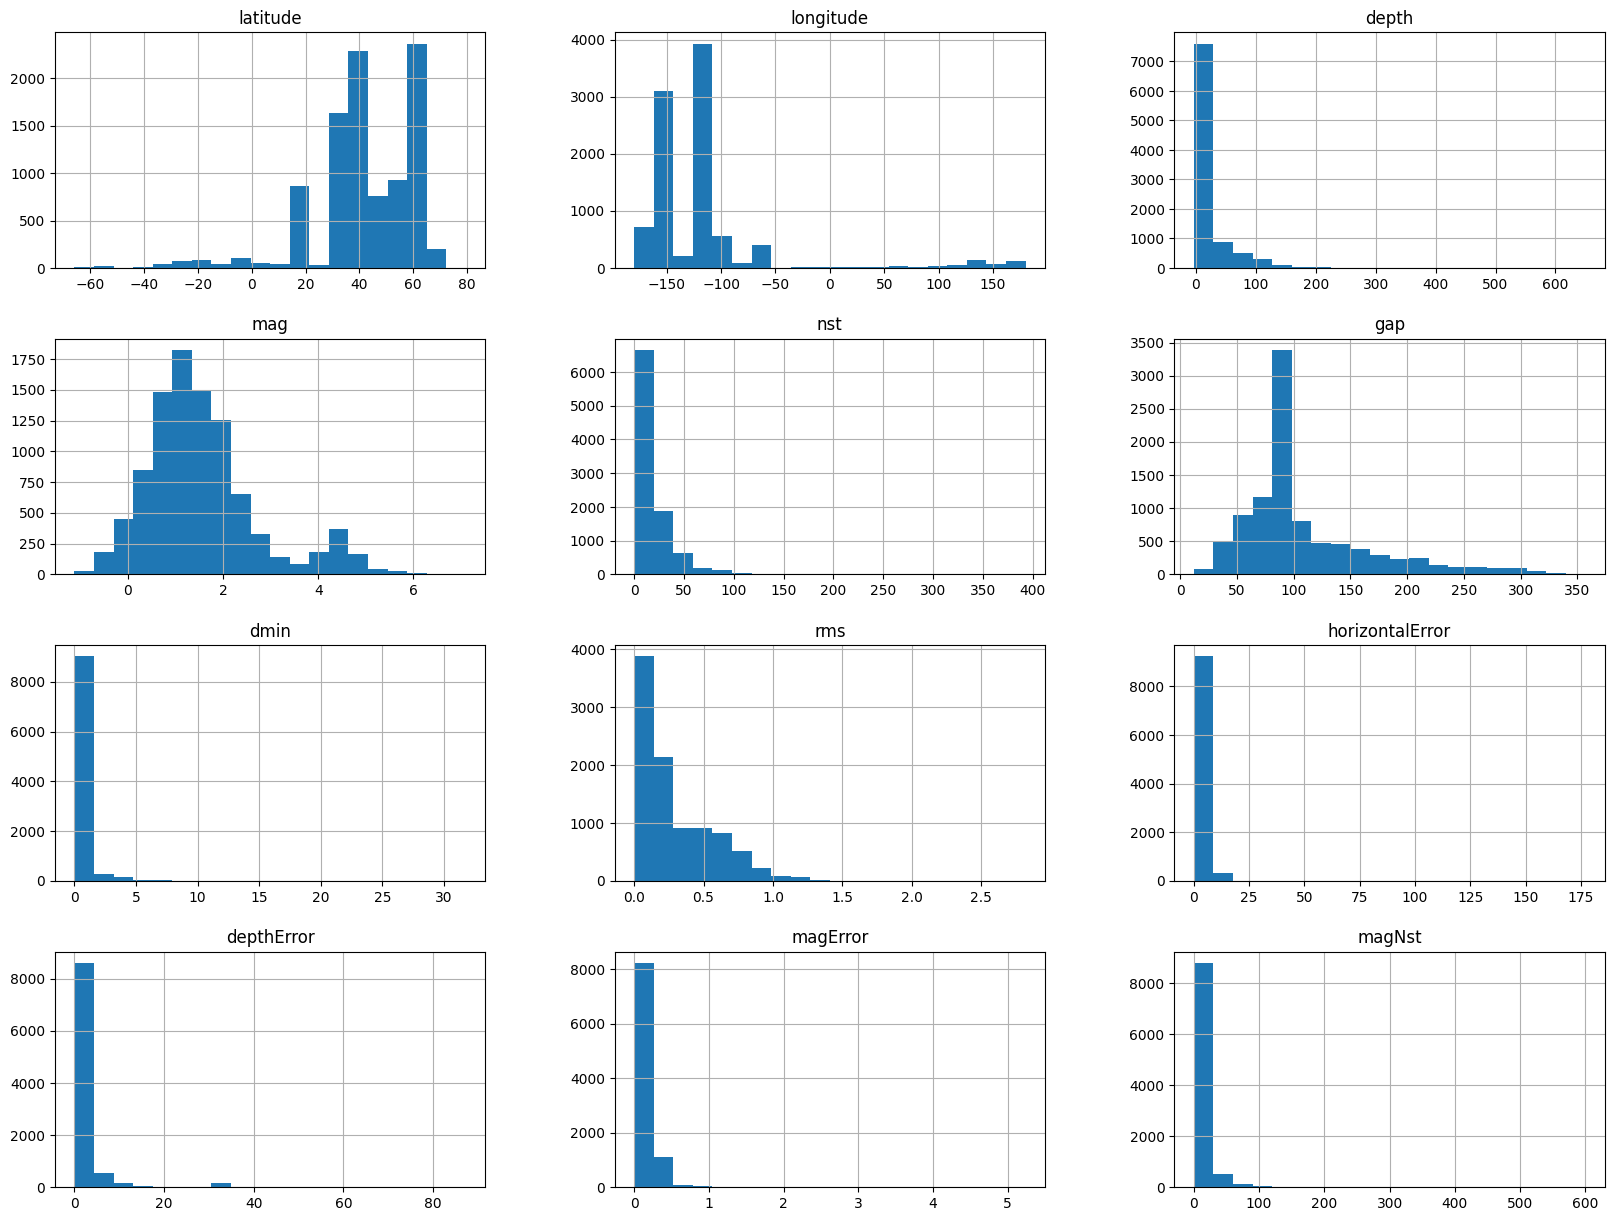

In [142]:
## calling the histogram method on the whole dataset
work_data.hist(bins=20, figsize=(20,15))
plt.show()

array([[<Axes: title={'center': 'mag'}>]], dtype=object)

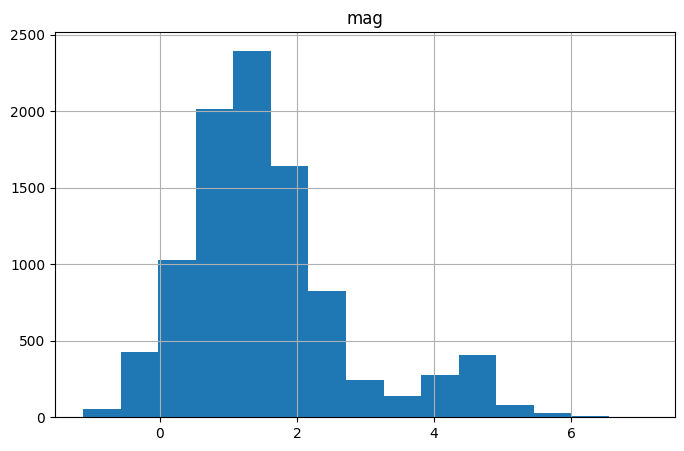

In [143]:
## create a magnified histogram for magnitude
work_data.hist ("mag", bins=15, figsize=(8,5))

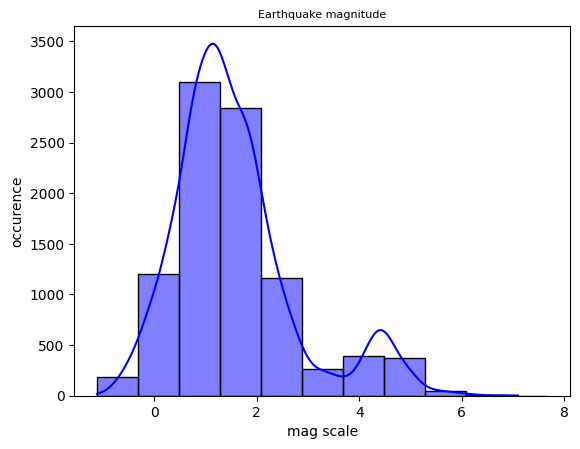

In [144]:
# mag gives a non symmetric bi-modal distribution (2 modes)
sns.histplot(work_data['mag'],binwidth=0.8, kde=True, color="blue")
plt.title('Earthquake magnitude', fontsize=8)
plt.xlabel('mag scale', fontsize=10)
plt.ylabel('occurence', fontsize=10)
plt.gca().set_facecolor('none')
#pd.option_context('mode.use_inf_as_na', True)

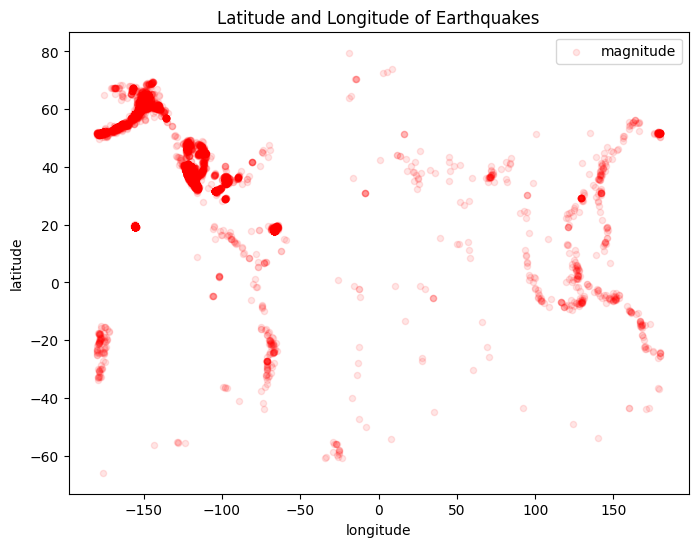

In [145]:
## Plotting Geographical data Alpha helps to visualize locations with high desity of data points
work_data.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1, label = 'magnitude', color = 'red', figsize=(8, 6))
plt.title('Latitude and Longitude of Earthquakes', fontsize=12)
plt.gca().set_facecolor('none')

array([[<Axes: xlabel='mag', ylabel='mag'>,
        <Axes: xlabel='gap', ylabel='mag'>,
        <Axes: xlabel='depth', ylabel='mag'>,
        <Axes: xlabel='nst', ylabel='mag'>,
        <Axes: xlabel='rms', ylabel='mag'>,
        <Axes: xlabel='horizontalError', ylabel='mag'>],
       [<Axes: xlabel='mag', ylabel='gap'>,
        <Axes: xlabel='gap', ylabel='gap'>,
        <Axes: xlabel='depth', ylabel='gap'>,
        <Axes: xlabel='nst', ylabel='gap'>,
        <Axes: xlabel='rms', ylabel='gap'>,
        <Axes: xlabel='horizontalError', ylabel='gap'>],
       [<Axes: xlabel='mag', ylabel='depth'>,
        <Axes: xlabel='gap', ylabel='depth'>,
        <Axes: xlabel='depth', ylabel='depth'>,
        <Axes: xlabel='nst', ylabel='depth'>,
        <Axes: xlabel='rms', ylabel='depth'>,
        <Axes: xlabel='horizontalError', ylabel='depth'>],
       [<Axes: xlabel='mag', ylabel='nst'>,
        <Axes: xlabel='gap', ylabel='nst'>,
        <Axes: xlabel='depth', ylabel='nst'>,
        <Axes: xl

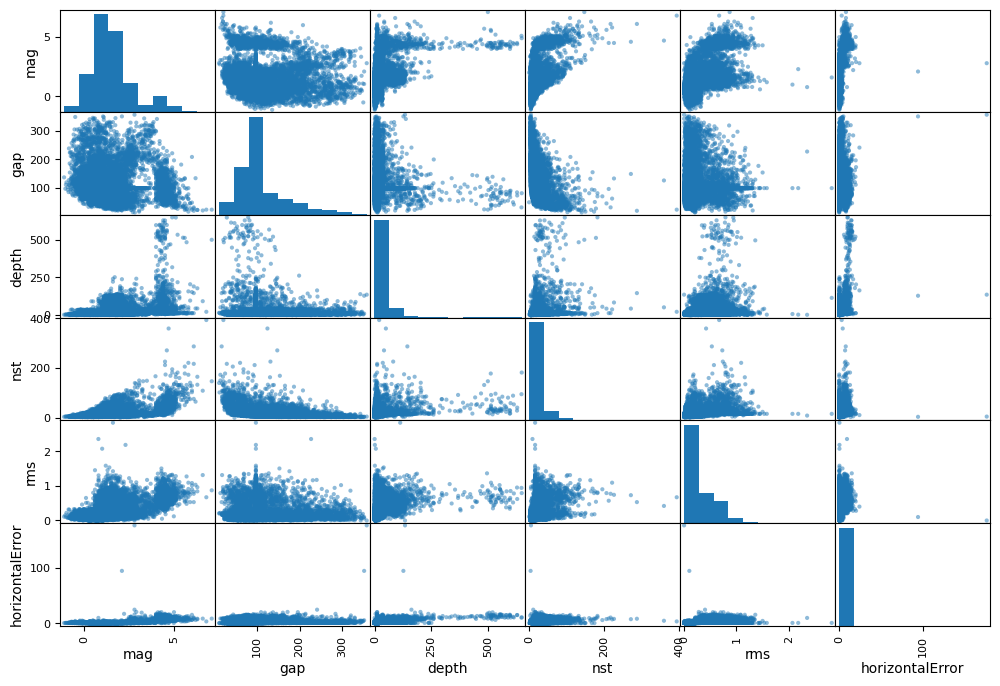

In [146]:
from pandas.plotting import scatter_matrix
attributes = ["mag","gap","depth","nst","rms", "horizontalError"]
scatter_matrix(work_data[attributes], figsize=(12,8))

In [147]:
## calling the pivot table function to mionitor correlation
table = pd.DataFrame(pd.pivot_table(work_data, index=['longitude', 'mag'], aggfunc='corr', values = 'magError'))
table


,,,magError
longitude,mag,,
-155.495834,1.99,magError,1.0
-155.279500,0.43,magError,1.0
-155.279007,1.83,magError,1.0
-155.277832,1.75,magError,1.0
-155.276672,1.77,magError,1.0
-122.819832,1.08,magError,1.0
-122.816834,0.77,magError,1.0
-122.815834,0.76,magError,1.0
-122.815666,0.72,magError,1.0


array([[<Axes: xlabel='mag', ylabel='mag'>,
        <Axes: xlabel='latitude', ylabel='mag'>,
        <Axes: xlabel='longitude', ylabel='mag'>,
        <Axes: xlabel='depth', ylabel='mag'>,
        <Axes: xlabel='magNst', ylabel='mag'>],
       [<Axes: xlabel='mag', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='depth', ylabel='latitude'>,
        <Axes: xlabel='magNst', ylabel='latitude'>],
       [<Axes: xlabel='mag', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='depth', ylabel='longitude'>,
        <Axes: xlabel='magNst', ylabel='longitude'>],
       [<Axes: xlabel='mag', ylabel='depth'>,
        <Axes: xlabel='latitude', ylabel='depth'>,
        <Axes: xlabel='longitude', ylabel='depth'>,
        <Axes: xlabel='depth', ylabel='depth'>,
        <Axes: xlabel='magNst', ylabe

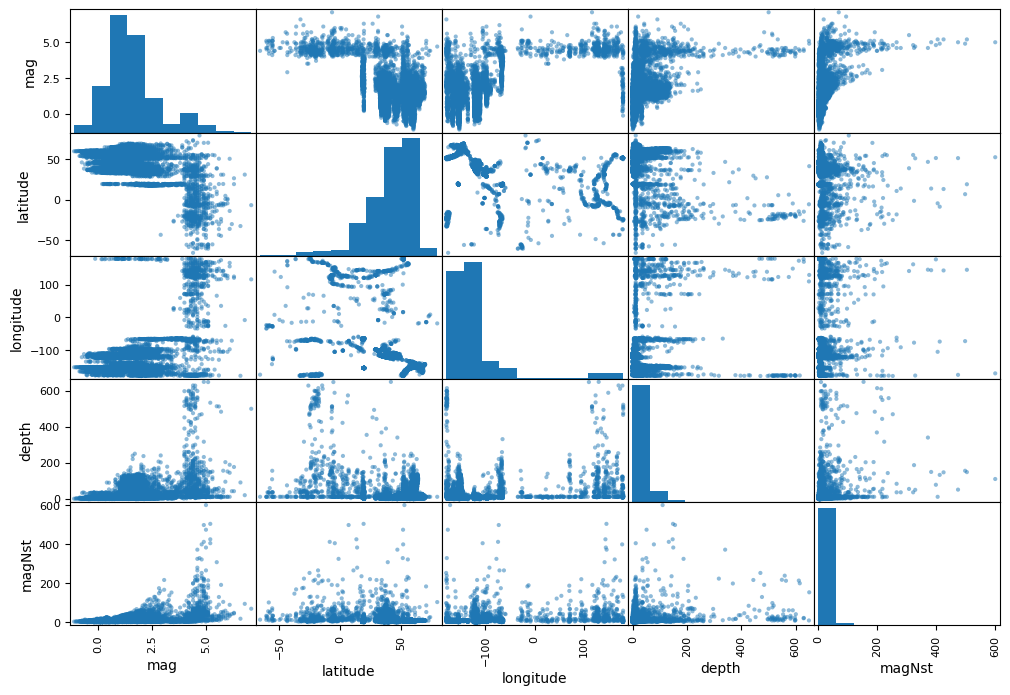

In [159]:
## plotting a scatter matrix for columns under investigation
from pandas.plotting import scatter_matrix
attributes = ["mag","latitude", "longitude", 'depth', 'magNst']
scatter_matrix(work_data[attributes], figsize=(12,8))

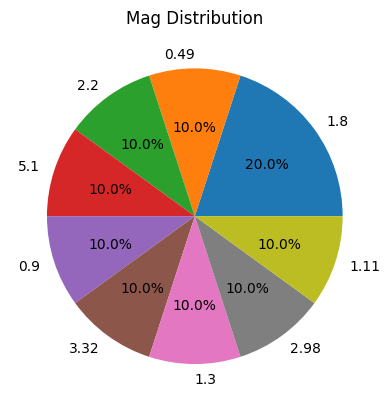

In [160]:
## plotting the Magnitude Distribution using Pie chart
mag_count = work_data.head(10)['mag'].value_counts().reset_index()

mag_count.columns = ['mag', 'count']

 

fig, ax = plt.subplots()

ax.pie(mag_count['count'], labels=mag_count['mag'], autopct='%1.1f%%')

ax.set_aspect('equal')

plt.title('Mag Distribution')

plt.show()

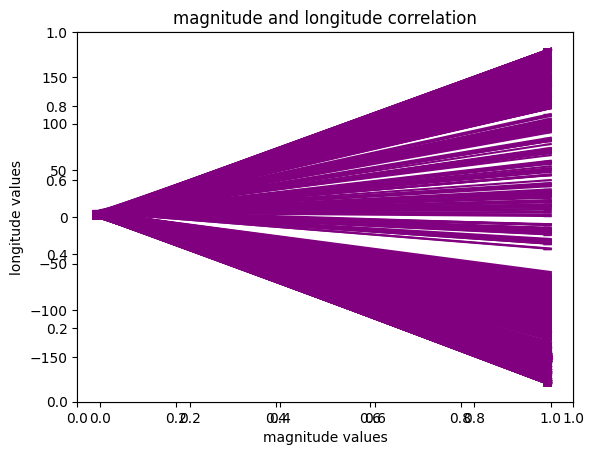

In [152]:
## showing the Magnitude and longitude relationship on a linear graph
fig, ax = plt.subplots()
y = (work_data['longitude'])
x = work_data['mag']
ax = fig.subplots()
ax.plot((x,y), color = 'purple', marker = 0)
ax.set_title('magnitude and longitude correlation')
ax.set_xlabel("magnitude values")
ax.set_ylabel('longitude values')
plt.show()

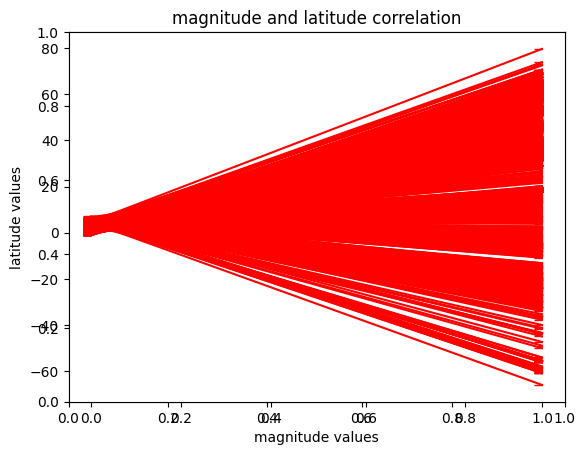

In [153]:
## showing the Magnitude and latitude relationship on a linear plot
fig, ax = plt.subplots()
y = (work_data['latitude'])
x = work_data['mag']
ax = fig.subplots()
ax.plot((x,y), color = 'red', marker = 0)
ax.set_title('magnitude and latitude correlation')
ax.set_xlabel("magnitude values")
ax.set_ylabel('latitude values')
plt.show()

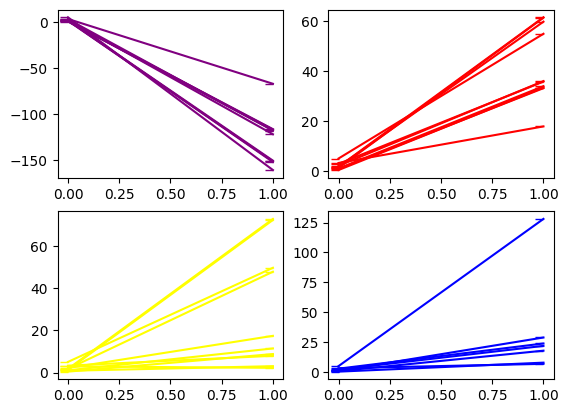

In [154]:
#plotting workHead (first few lines of dataset) magnitude over latitude, latitude, depth and magNst to compare behaviour
x = workHead['mag']
y = workHead['longitude']
y2 = workHead['latitude']
y3 = workHead['depth']
y4 = workHead['magNst']
fig, ax = plt.subplots(2, 2)
ax[0,0].plot((x,y), color = 'purple', marker = 0)
ax[0,1].plot((x,y2), color = 'red', marker = 0)
ax[1,0].plot((x,y3), color = 'yellow', marker = 0)
ax[1,1].plot((x,y4), color = 'blue', marker = 0)
plt.show()

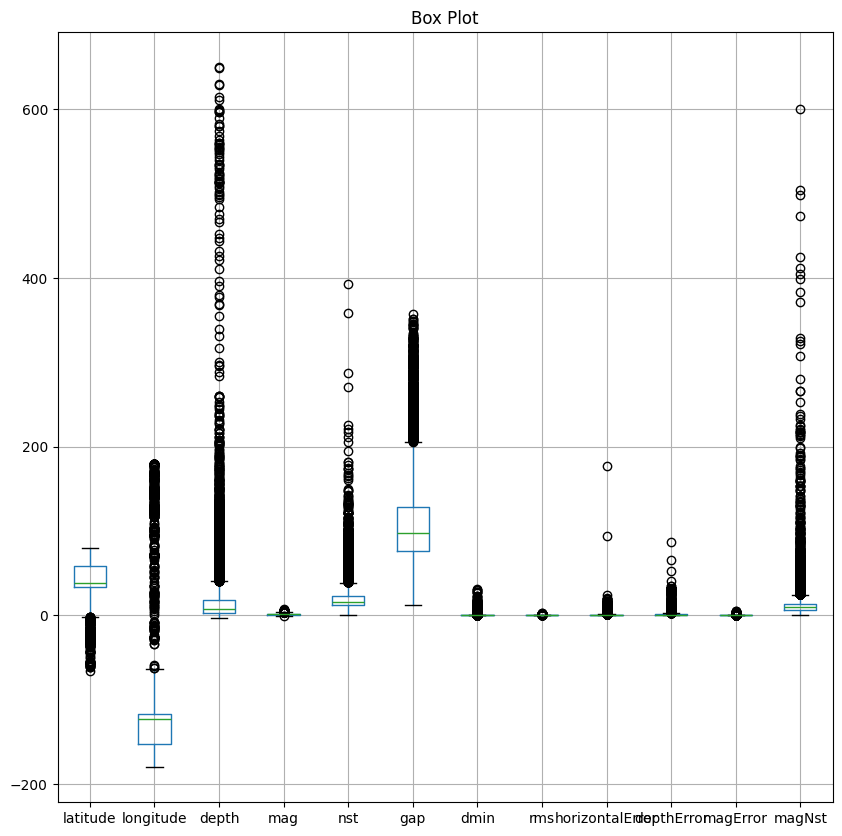

In [155]:
## calling Box plot for whole dataset
work_data.boxplot(figsize=(10,10))
plt.title('Box Plot', loc="center")
plt.gca().set_facecolor('none')
plt.show()

In [161]:
## identifying the modal(highest occurence) location
work_data['place'] = work_data['place'].astype(str)
work_data["place"].value_counts()

place
7 km NW of The Geysers, CA              128
Alaska Peninsula                        123
Southern Alaska                         119
8 km NW of The Geysers, CA               97
85 km NNW of Karluk, Alaska              88
                                       ... 
2 km SW of Chester, CA                    1
35 km NNW of Leavenworth, Washington      1
156 km SSE of Alcan Border, Alaska        1
18 km NNW of Cloverdale, CA               1
1 km NE of Alamo, CA                      1
Name: count, Length: 5316, dtype: int64

<Axes: xlabel='place'>

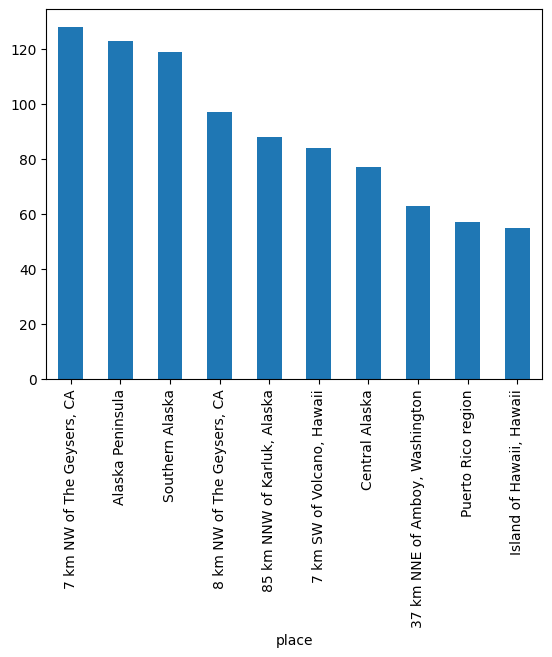

In [164]:
pd.Series(work_data["place"]).value_counts()[:10].plot(kind="bar")